In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [ ]:
data = pd.read_csv("/content/IMDB Dataset.csv", engine='python', on_bad_lines='skip')
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
import re
nltk.download('stopwords')
stop = set(stopwords.words('english'))

def clean_text(text):
    text = re.sub(r'<.*?>', '', text)  # remove HTML tags
    text = re.sub(r'[^a-zA-Z]', ' ', text)  # keep only letters
    text = text.lower()
    text = ' '.join([word for word in text.split() if word not in stop])
    return text

data['clean_review'] = data['review'].apply(clean_text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
data['sentiment'] = data['sentiment'].map({'positive': 1, 'negative': 0})


In [ ]:
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(data['clean_review']).toarray()
y = data['sentiment']

SVM Model Performance:
Accuracy: 0.8857946827091014
              precision    recall  f1-score   support

           0       0.89      0.88      0.89      5144
           1       0.88      0.89      0.89      5162

    accuracy                           0.89     10306
   macro avg       0.89      0.89      0.89     10306
weighted avg       0.89      0.89      0.89     10306



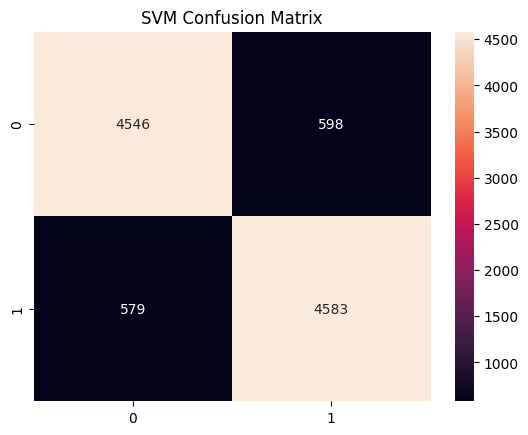

In [ ]:
from sklearn.svm import SVC

# Initialize and train the SVM model
svm_model = SVC(kernel='linear') # Linear kernel is often effective for text data
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_svm = svm_model.predict(X_test)

# Evaluate the SVM model
print("SVM Model Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt='d')
plt.title("SVM Confusion Matrix")
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

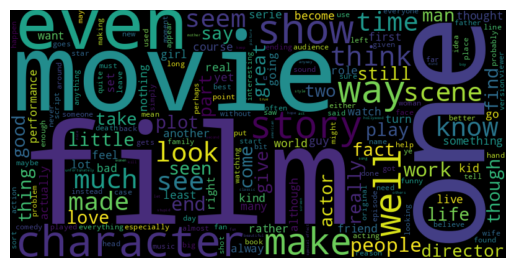

In [ ]:
from wordcloud import WordCloud
all_words = ' '.join(data['clean_review'])
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(all_words)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
